In [ ]:
Aim: Implement Decsion Tree classifier

Implement Decision Tree classifier using scikit learn library
Test the classifier for Weather dataset

In [ ]:
Step 1: Import necessary libraries.

In [2]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [ ]:
    Step 2: Prepare dataset.

In [3]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [ ]:
Step 3: Digitize the data set using encoding

In [4]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
Step 4: Merge different features to prepare dataset

In [5]:

features = tuple(zip(Outlook_encoded, Temperature_encoded, Humidity_encoded, Wind_encoded))
features

((1, 1, 0, 0),
 (1, 1, 0, 1),
 (0, 1, 0, 0),
 (2, 2, 0, 0),
 (2, 0, 1, 0),
 (2, 0, 1, 1),
 (0, 0, 1, 1),
 (1, 2, 0, 0),
 (1, 0, 1, 0),
 (2, 2, 1, 0),
 (1, 2, 1, 1),
 (0, 2, 0, 1),
 (0, 1, 1, 0),
 (2, 2, 0, 1))

In [ ]:
Step 5: Train ’Create and Train DecisionTreeClassifier’

In [6]:
#Create a Decision Tree Classifier (using Entropy)
DT = DecisionTreeClassifier(criterion = "entropy")

# Train the model using the training sets
final_model = DT.fit(features, Play_encoded) #(features, Class_label)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [ ]:
Step 6: Predict Output for new data

In [7]:
#Predict Output
prediction = DT.predict([[0, 1, 1, 0],[2, 2, 1, 1], [2, 2, 0, 1]]) # last is from training dataset and expected o/p was 0 and it is
print("Predicted Values for Playing: ", prediction) #No:0 ; Yes:1


Predicted Values for Playing:  [1 1 0]


In [ ]:
Step 7: Display Decsion Tree Created
 
 - This step requires graphviz and tkinter packages installed

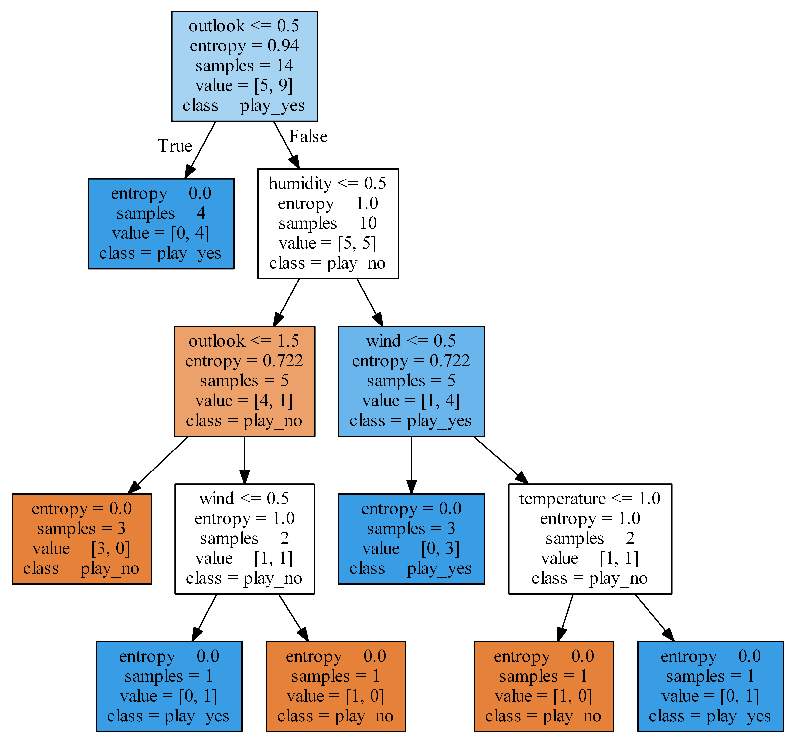

In [9]:

from sklearn.tree import export_graphviz
export_graphviz(DT,out_file='tree_entropy.dot',
               feature_names=['outlook','temperature','humidity','wind'],
               class_names=['play_no','play_yes'], 
               filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'], shell=True)

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off')
plt.show()

[Text(111.60000000000001, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = No'), Text(74.4, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = No'), Text(148.8, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = Yes'), Text(74.4, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = Yes'), Text(37.2, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Yes'), Text(111.60000000000001, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Yes'), Text(74.4, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No'), Text(148.8, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'), Text(223.20000000000002, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = No'), Text(186.0, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = No'), Text(260.40000000000003, 65.232, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\ncla

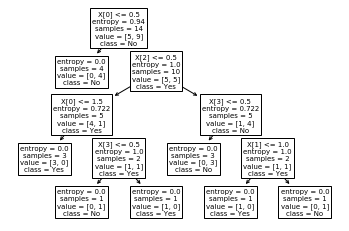

In [10]:
from sklearn.tree import plot_tree
print(plot_tree(DT,  class_names = ["Yes", "No"]))

In [13]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install tkinter

ERROR: Could not find a version that satisfies the requirement tkinter
ERROR: No matching distribution found for tkinter
Note: you may need to restart the kernel to use updated packages.
